Tugas Modul : Modelling

Dataset : Tweet(Emosi)

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Pre-processing Text**

In [47]:
df = pd.read_csv("tweet_emotions.csv")
print("Jumlah data:", len(df))
df.head()

Jumlah data: 40000


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [48]:
print("\nCek nilai null:")
print(df.isnull().sum())
df = df.drop_duplicates(subset='content').dropna(subset=['content', 'sentiment'])
df.rename(columns={'content': 'text'}, inplace=True)


Cek nilai null:
tweet_id     0
sentiment    0
content      0
dtype: int64


# **Exploratory Data Analysis (EDA**

/tmp/ipython-input-483207114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette="Set2")


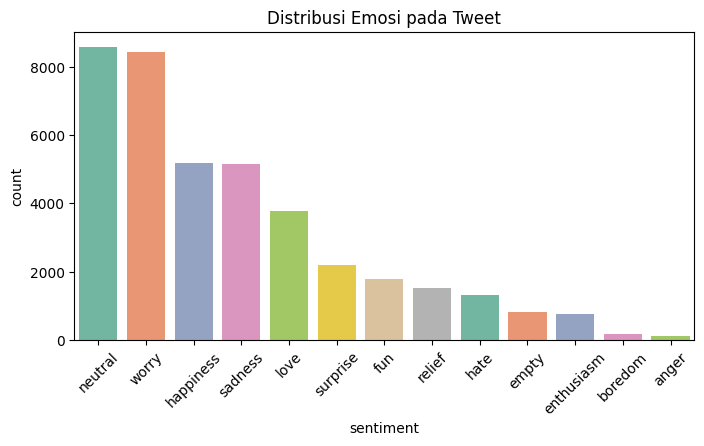

In [50]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette="Set2")
plt.title("Distribusi Emosi pada Tweet")
plt.xticks(rotation=45)
plt.show()

# **Fine-Tuning Model (Modelling)**

In [65]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000))
])

In [66]:
# Latih model
model.fit(train_texts, train_labels)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=1000))])

In [67]:
# Prediksi
y_pred = model.predict(test_texts)

In [68]:
# Evaluasi
print("=== HASIL EVALUASI MODEL (Logistic Regression) ===")
print(classification_report(test_labels, y_pred))

=== HASIL EVALUASI MODEL (Logistic Regression) ===
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        22
     boredom       0.00      0.00      0.00        36
       empty       0.00      0.00      0.00       164
  enthusiasm       0.00      0.00      0.00       152
         fun       0.16      0.02      0.04       355
   happiness       0.34      0.36      0.35      1037
        hate       0.43      0.11      0.17       264
        love       0.47      0.36      0.41       757
     neutral       0.34      0.55      0.42      1720
      relief       0.41      0.04      0.07       304
     sadness       0.32      0.25      0.28      1031
    surprise       0.20      0.03      0.05       436
       worry       0.34      0.50      0.40      1688

    accuracy                           0.35      7966
   macro avg       0.23      0.17      0.17      7966
weighted avg       0.32      0.35      0.31      7966



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
